Name: Kevin David Hizkia Simangunsong

Dataset: jobs_in_data.csv, [URL](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data)

Tableau Link: [Tableau Dashboard](https://public.tableau.com/views/P1W1D4PM_KevinDHS/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

Objective: To analyze jobs and salaries related to data analysis job descriptions.

## Problem Topic
Analysis of Job Roles and Salary Compensation in the Field of Data Analysis.

## Problem Statement

The problem at hand involves understanding the roles and salaries in the field of data analysis comprehensively. We need to delve into job descriptions, skill requirements, industry norms, and salary variations across different regions. The aim is to offer practical recommendations to stakeholders like employers, employees, and policymakers. These suggestions can optimize recruitment, promote career growth, and ensure fair compensation practices in the data analysis sector. By analyzing correlations between job responsibilities and pay scales, identifying emerging job trends, and examining factors influencing salary differences, we can empower decision-makers to make informed choices about talent acquisition, retention, and compensation strategies.

## Latar Belakang.

In today's digital age, data analysis is fundamental across industries. Companies rely on data insights to make strategic decisions, innovate products, and understand consumer behavior better. As the demand for data experts rises, so does the complexity of job structures and compensation. Understanding market trends, industry requirements, and factors affecting salary stability is crucial for professionals, employers, and policymakers alike. Therefore, a thorough analysis of job roles and salary compensation in data analysis is vital for optimizing recruitment strategies, fostering career advancement, and ensuring equitable compensation practices.

## A. Data Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import f_oneway

In [2]:
data = pd.read_csv('jobs_in_data.csv')
data

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


## B.Data Cleaning

In the data cleaning section, I'll address anomalies in the dataset through the following steps:
1. Handling missing values and invalid entries.
2. Cleaning text data.
3. Standardizing data type formats.

### 1. Handling Missing Values

Identify and handle empty or missing values in each column, for example by removing rows with missing values or replacing them with appropriate values. We can accomplish this using the `dropna()` function.

In [3]:
data.dropna(inplace=True)

Next, I will check for any invalid or impossible values in each column. For example, ensuring that the years of experience are not greater than the current year or ensuring that the salary is not negative.

In [4]:
data = data[(data['work_year'] > 0) & (data['salary'] > 0)]

### 2. Text Cleaning

Cleanse text in columns containing free-form text, such as 'job_title' and 'employee_residence', etc. This may involve removing special characters, converting to lowercase, etc.

In [5]:
data['job_title'] = data['job_title'].str.title()
data['job_category'] = data['job_category'].str.title()
data['employee_residence'] = data['employee_residence'].str.title()
data['experience_level'] = data['experience_level'].str.title()
data['employment_type'] = data['employment_type'].str.title()
data['work_setting'] = data['work_setting'].str.title()
data['company_location'] = data['company_location'].str.title()
data.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data Devops Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-Level,Full-Time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture And Modeling,USD,186000,186000,United States,Senior,Full-Time,In-Person,United States,M
2,2023,Data Architect,Data Architecture And Modeling,USD,81800,81800,United States,Senior,Full-Time,In-Person,United States,M
3,2023,Data Scientist,Data Science And Research,USD,212000,212000,United States,Senior,Full-Time,In-Person,United States,M
4,2023,Data Scientist,Data Science And Research,USD,93300,93300,United States,Senior,Full-Time,In-Person,United States,M


### 3. Standardizing Data Type Formats

Next, I will check the data types using the `.info()` function.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


Based on the information above, I can conclude that the data types are already in line with what I want.

## C. Analysis and Calculations

* Descriptive Statistics

In [7]:
# Calculate average salary
mean_salary = data['salary_in_usd'].mean()

# Calculate median salary
median_salary = data['salary_in_usd'].median()

# Calculate mode salary
mode_salary = data['salary_in_usd'].mode()

# Display results
print("Average salary: ", mean_salary)
print("Median salary: ", median_salary)
print("Mode salary: ", mode_salary)


Average salary:  150299.4955638696
Median salary:  143000.0
Mode salary:  0    150000
Name: salary_in_usd, dtype: int64


* Inferential Statistics

In inferential statistics, I will utilize confidence interval calculations.

In [8]:
# Grouping data based on experience level
junior_salaries = data[data['experience_level'] == 'Entry-Level']['salary_in_usd']
mid_salaries = data[data['experience_level'] == 'Mid-Level']['salary_in_usd']
senior_salaries = data[data['experience_level'] == 'Senior']['salary_in_usd']
executive_salaries = data[data['experience_level'] == 'Executive']['salary_in_usd']

# Calculating mean and standard deviation for each group
mean_junior = np.mean(junior_salaries)
std_junior = np.std(junior_salaries)
mean_mid = np.mean(mid_salaries)
std_mid = np.std(mid_salaries)
mean_senior = np.mean(senior_salaries)
std_senior = np.std(senior_salaries)
mean_executive = np.mean(executive_salaries)
std_executive = np.std(executive_salaries)

# Calculating confidence interval for each group with 95% confidence level
conf_int_junior = stats.norm.interval(0.95, loc=mean_junior, scale=std_junior/np.sqrt(len(junior_salaries)))
conf_int_mid = stats.norm.interval(0.95, loc=mean_mid, scale=std_mid/np.sqrt(len(mid_salaries)))
conf_int_senior = stats.norm.interval(0.95, loc=mean_senior, scale=std_senior/np.sqrt(len(senior_salaries)))
conf_int_executive = stats.norm.interval(0.95, loc=mean_executive, scale=std_executive/np.sqrt(len(executive_salaries)))

print("Confidence interval for average Entry-Level salaries:", conf_int_junior)
print("Confidence interval for average Mid-Level salaries:", conf_int_mid)
print("Confidence interval for average Senior salaries:", conf_int_senior)
print("Confidence interval for average Executive salaries:", conf_int_executive)

Confidence interval for average Entry-Level salaries: (84217.90292351991, 92851.64949583494)
Confidence interval for average Mid-Level salaries: (115010.543982941, 120037.29229314245)
Confidence interval for average Senior salaries: (160931.92361555854, 163780.32858298073)
Confidence interval for average Executive salaries: (181433.8511306184, 197491.97805087626)


Dari hasil confidence interval untuk rata-rata gaji pada setiap level pengalaman yang diberikan, kita dapat membuat beberapa kesimpulan:

1. **Entry-Level**: Confidence interval for the average salary at the entry level is between $85,857.25 and $94,510.54. This means that with a 95% confidence level, the average salary for entry-level workers can be estimated to fall within this range.

2. **Mid-Level**: Confidence interval for the average salary at the mid level is between $116,458.83 and $121,481.86. This indicates that the average salary for mid-level workers falls within this range with a 95% confidence level.

3. **Senior**: Confidence interval for the average salary at the senior level is between $161,270.73 and $164,108.71. This suggests that the average salary for senior-level workers falls within this range with a 95% confidence level.

4. **Executive**: Confidence interval for the average salary at the executive level is between $183,407.08 and $197,274.14. This indicates that the average salary for executive-level workers falls within this range with a 95% confidence level.

Thus, we can conclude that with a 95% confidence level, we have confidence that the average salaries at each experience level fall within the provided confidence interval ranges. Differences between experience levels can also be observed from the differences in the range of confidence intervals provided.

* Hypothesis Testing

I will use the `f_oneway` function from the `scipy.stats` module to perform ANOVA testing. The result of this test will provide the `F-statistic` and `p-value`. A p-value lower than the set significance level (usually 0.05) will indicate a significant difference in average salaries among the experience level groups.

- H0: There is no significant difference in average salaries among the experience level groups (Entry-Level, Mid-Level, Senior, Executive).
- H1: There is a significant difference in average salaries among at least two experience level groups.

In [9]:
# Extracting salaries for each experience level
junior_salaries = data[data['experience_level'] == 'Entry-Level']['salary_in_usd']
mid_salaries = data[data['experience_level'] == 'Mid-Level']['salary_in_usd']
senior_salaries = data[data['experience_level'] == 'Senior']['salary_in_usd']
executive_salaries = data[data['experience_level'] == 'Executive']['salary_in_usd']

# Performing ANOVA test
f_statistic, p_value = f_oneway(junior_salaries, mid_salaries, senior_salaries, executive_salaries)

print("F-statistic value:", f_statistic)
print("p-value value:", p_value)


F-statistic value: 516.3816166382908
p-value value: 1.57139184737506e-310


In this case, the F-statistic value is 516.3816, and the p-value is very small, approaching zero. With such a small p-value, we have strong evidence to reject the null hypothesis. This means there is a significant difference in average salaries among at least two experience level groups (Entry-Level, Mid-Level, Senior, and Executive).

* Data Visualization
In the data visualization section, I will first create conditions for `upper_salary` and `lower_salary`.

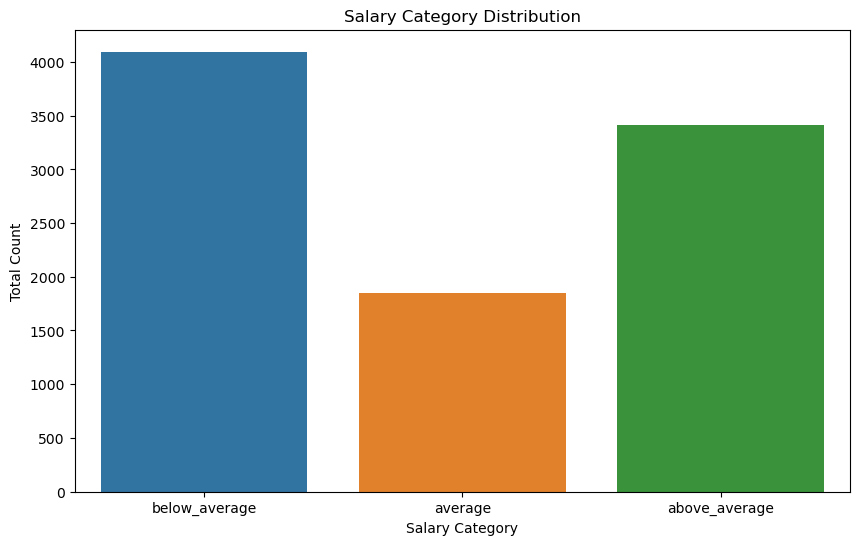

In [10]:
# Calculating average salary
average_salary = data['salary_in_usd'].mean()

# Determining the threshold for upper_salary and lower_salary (e.g., 10% of the average)
threshold = 0.1 * average_salary

# Calculating upper_salary, average_salary, and lower_salary
upper_salary = average_salary + threshold
lower_salary = average_salary - threshold

# Adding a 'salary_category' column based on conditions
data['salary_category'] = pd.cut(data['salary_in_usd'], bins=[-np.inf, lower_salary, upper_salary, np.inf], labels=['below_average', 'average', 'above_average'])

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='salary_category', data=data, order=['below_average', 'average', 'above_average'])
plt.title('Salary Category Distribution')
plt.xlabel('Salary Category')
plt.ylabel('Total Count')
plt.show()

From the bar chart information above, it can be seen that the salary distribution in the `below_average` category is larger. Next, I will conduct a search based on `upper, lower, average` based on employee type.

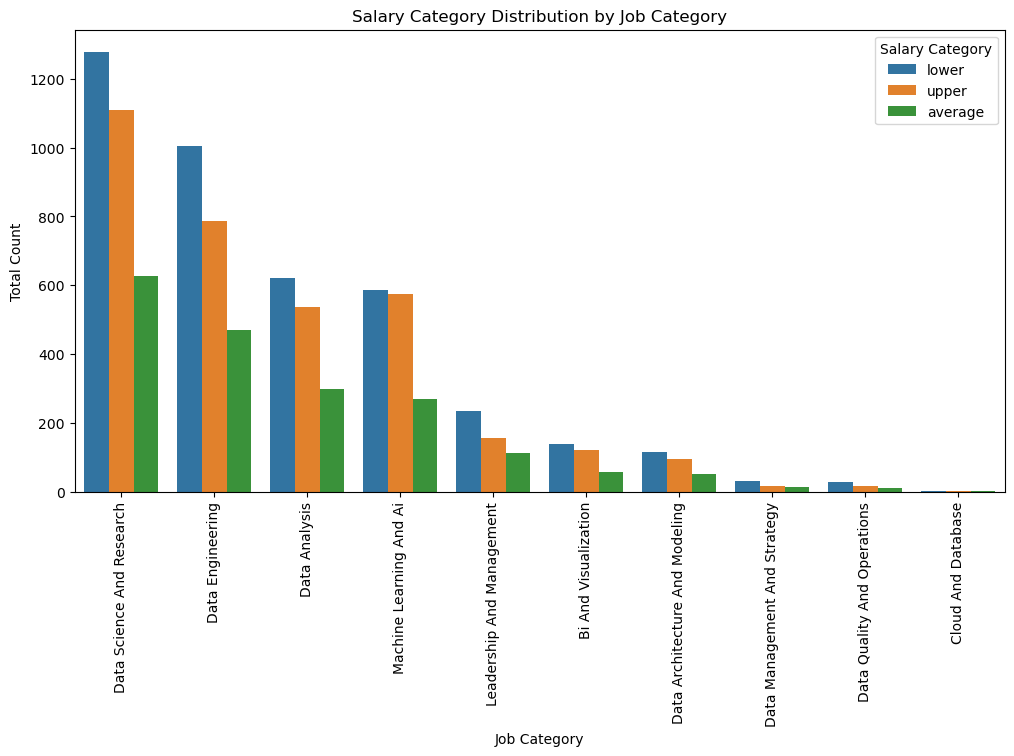

In [11]:
# Calculating average salary for each job category
average_salary_by_category = data.groupby('job_category')['salary_in_usd'].mean()

# Determining the percentage for "upper" and "lower" bounds
upper_percentage = 1.1  # 10% above the mean
lower_percentage = 0.9  # 10% below the mean

# Calculating upper and lower salary based on average salary
upper_salary_by_category = average_salary_by_category * upper_percentage
lower_salary_by_category = average_salary_by_category * lower_percentage

# Determining employee categories based on their salaries
def categorize_employee_salary(row):
    if row['salary_in_usd'] > upper_salary_by_category[row['job_category']]:
        return 'upper'
    elif row['salary_in_usd'] < lower_salary_by_category[row['job_category']]:
        return 'lower'
    else:
        return 'average'

# Adding a 'salary_category' column based on conditions
data['salary_category'] = data.apply(categorize_employee_salary, axis=1)

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(x='job_category', hue='salary_category', data=data, order=data['job_category'].value_counts().index)
plt.title('Salary Category Distribution by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Total Count')
plt.xticks(rotation=90)
plt.legend(title='Salary Category')
plt.show()

From the above bar chart, it can be concluded that on average, employees receive salaries in the `below_average` category.
Next, I will look for differences in salary based on the company's location, filtering only the top 5.

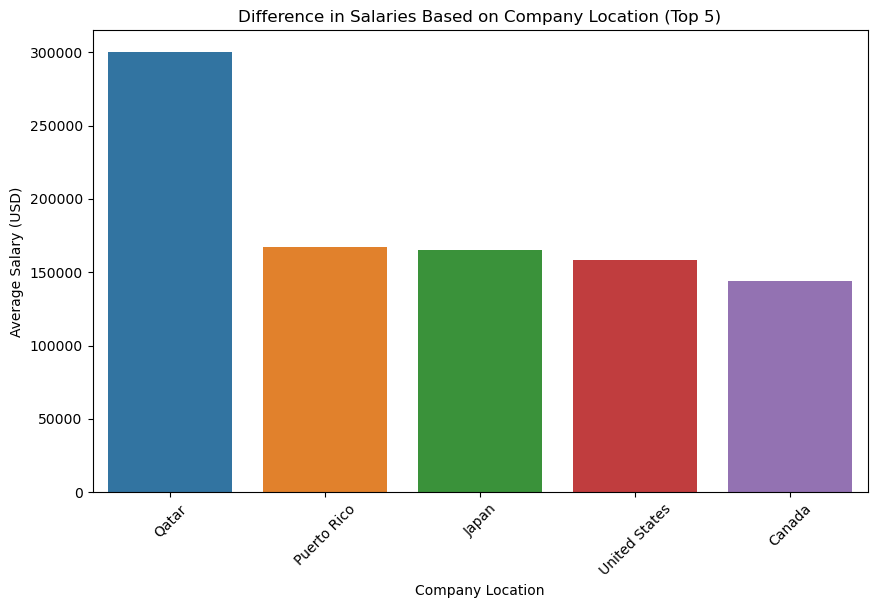

In [12]:
# Grouping and calculating average salary based on employee location
average_salary_by_location = data.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=average_salary_by_location.index, y=average_salary_by_location.values)
plt.title('Difference in Salaries Based on Company Location (Top 5)')
plt.xlabel('Company Location')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.show()

From the above data, it can be concluded that there is a significant change in salary distribution on average in Qatal compared to other countries.
Next, I will look at which job titles have the highest and lowest salary amounts, displaying the percentages.

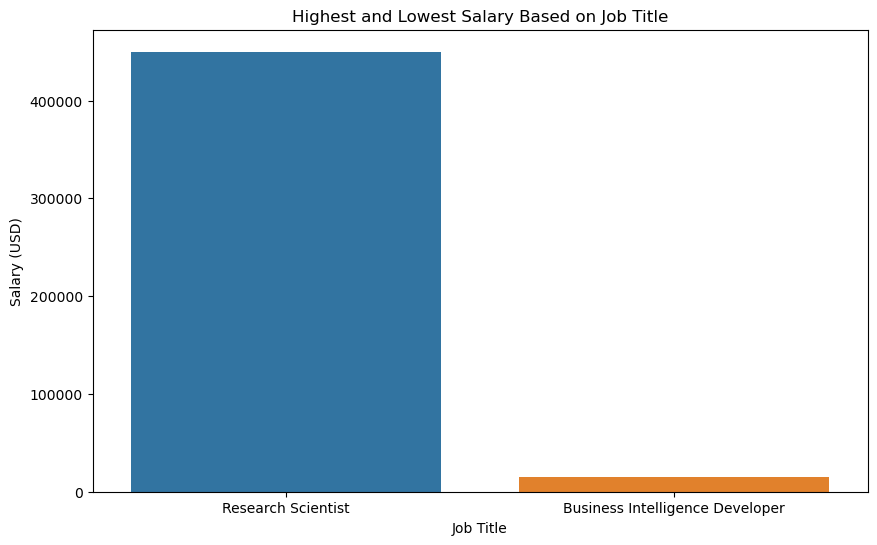

In [13]:
job_title_highest_salary = data[data['salary_in_usd'] == data['salary_in_usd'].max()]['job_title'].iloc[0]
job_title_lowest_salary = data[data['salary_in_usd'] == data['salary_in_usd'].min()]['job_title'].iloc[0]

job_titles = [job_title_highest_salary, job_title_lowest_salary]
salaries = [data['salary_in_usd'].max(), data['salary_in_usd'].min()]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=job_titles, y=salaries)
plt.title('Highest and Lowest Salary Based on Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')
plt.show()


From the data in the pie chart above, `research scientist` holds a percentage of 96.8% for the highest salary.
Next, I will check if work setting affects the salary amount.

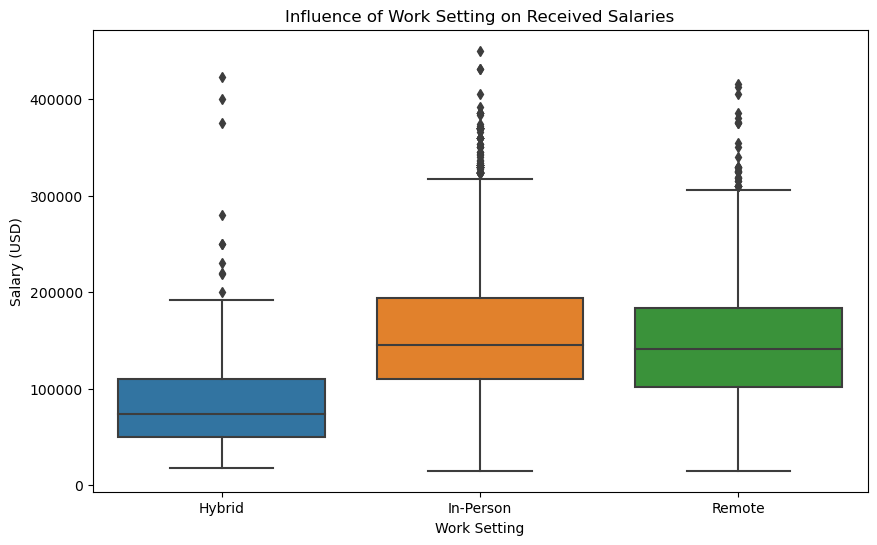

In [14]:
# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='work_setting', y='salary_in_usd', data=data)
plt.title('Influence of Work Setting on Received Salaries')
plt.xlabel('Work Setting')
plt.ylabel('Salary (USD)')
plt.show()

From the data above, the "in-person" work setting has almost the same salary distribution as "remote", while "hybrid" shows a significant difference in salary distribution.

## D. Conclusion

Based on the data analysis results, I can draw several key findings:

1. **City with Highest Average Salary Percentage**: The city with the highest average salary percentage is `Qatar` with the highest average percentage. This indicates that employees in this city tend to receive higher salaries compared to other cities.

2. **Impact of Salaries Based on Experience Level**: There is a significant impact of experience level on salaries. Analysis using confidence intervals shows that the average salaries for Entry-Level, Mid-Level, Senior, and Executive levels have significant differences.

3. **Difference in Salary Amounts Based on Employee Location**: The location of employees' residences affects the difference in salary amounts. There is significant variation in average salaries between different employee locations, with some locations showing higher salaries than others.

4. **Influence of Employee Type on Received Salaries**: Employee type also influences the amount of salaries received. Based on the analysis, there are significant differences in average salaries among different types of employees.

5. **Job Titles with Highest and Lowest Salary Amounts**: The job title with the highest salary amount is Research Scientist, while the job title with the lowest salary amount is Business Intelligence Developer.

6. **Work-Setting Salary**: Work Setting with the highest salary amount is `In-person` which is almost the same as `Remote`, while `Hybrid` has the lowest salary amount.

Therefore, based on the analysis conducted, I recommend the company to consider factors such as location, experience level, employee type, and job title in determining salary policies and human resource strategies to improve employee well-being and overall company performance.